In [124]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [125]:
df = pd.read_csv(r"C:\Users\rishi\Desktop\titanic\Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


preprocessing

In [126]:
df.drop("Name",axis = 1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [127]:
df.shape

(891, 11)

In [128]:
df.drop("PassengerId",axis = 1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [129]:
df["Cabin"].sample

<bound method NDFrame.sample of 0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object>

In [130]:
# Correct way to replace NaN and non-NaN values
df["Cabin"] = df["Cabin"].apply(lambda x: 1 if pd.notna(x) else 0)

In [131]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,0,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,1,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,1,1,female,35.0,1,0,113803,53.1000,1,S
4,0,3,male,35.0,0,0,373450,8.0500,0,S


In [132]:
df = df.drop("Ticket",axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,0,S
1,1,1,female,38.0,1,0,71.2833,1,C
2,1,3,female,26.0,0,0,7.9250,0,S
3,1,1,female,35.0,1,0,53.1000,1,S
4,0,3,male,35.0,0,0,8.0500,0,S


In [133]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [134]:
df["Sex"] = le.fit_transform(df["Sex"])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,0,S
1,1,1,0,38.0,1,0,71.2833,1,C
2,1,3,0,26.0,0,0,7.9250,0,S
3,1,1,0,35.0,1,0,53.1000,1,S
4,0,3,1,35.0,0,0,8.0500,0,S


In [135]:
df["Embarked"] = le.fit_transform(df["Embarked"])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,0,2
1,1,1,0,38.0,1,0,71.2833,1,0
2,1,3,0,26.0,0,0,7.9250,0,2
3,1,1,0,35.0,1,0,53.1000,1,2
4,0,3,1,35.0,0,0,8.0500,0,2


In [136]:
from sklearn.preprocessing import MinMaxScaler
me = MinMaxScaler()

In [137]:
df["Age_scaled"] = me.fit_transform(df[["Age"]])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_scaled
0,0,3,1,22.0,1,0,7.2500,0,2,0.271174
1,1,1,0,38.0,1,0,71.2833,1,0,0.472229
2,1,3,0,26.0,0,0,7.9250,0,2,0.321438
3,1,1,0,35.0,1,0,53.1000,1,2,0.434531
4,0,3,1,35.0,0,0,8.0500,0,2,0.434531


In [138]:
df = df.drop("Age",axis=1)
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Age_scaled
0,0,3,1,1,0,7.2500,0,2,0.271174
1,1,1,0,1,0,71.2833,1,0,0.472229
2,1,3,0,0,0,7.9250,0,2,0.321438
3,1,1,0,1,0,53.1000,1,2,0.434531
4,0,3,1,0,0,8.0500,0,2,0.434531


In [139]:
df["Fare"] = me.fit_transform(df[["Fare"]])
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Age_scaled
0,0,3,1,1,0,0.014151,0,2,0.271174
1,1,1,0,1,0,0.139136,1,0,0.472229
2,1,3,0,0,0,0.015469,0,2,0.321438
3,1,1,0,1,0,0.103644,1,2,0.434531
4,0,3,1,0,0,0.015713,0,2,0.434531


In [140]:
X = df.drop("Survived",axis = 1)
X.head()

,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Age_scaled
0,3,1,1,0,0.014151,0,2,0.271174
1,1,0,1,0,0.139136,1,0,0.472229
2,3,0,0,0,0.015469,0,2,0.321438
3,1,0,1,0,0.103644,1,2,0.434531
4,3,1,0,0,0.015713,0,2,0.434531


In [141]:
y = df["Survived"]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [142]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [143]:
len(X_train)

668

In [144]:
len(X_test)

223

In [145]:
len(X_train.columns)

8

In [146]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [147]:
X_train_scaled = sc.fit_transform(X_train)

In [148]:
X_test_scaled = sc.fit_transform(X_test)
X_test.head()

,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Age_scaled
882,3,0,0,0,0.020527,0,2,0.271174
306,1,0,0,0,0.216430,0,0,NaN
244,3,1,0,0,0.014102,0,0,0.371701
368,3,0,0,0,0.015127,0,1,NaN
681,1,1,0,0,0.149765,1,0,0.334004


making our dense neural network

In [149]:
import tensorflow as tf
from tensorflow import keras

In [150]:
model = keras.Sequential([
    keras.layers.Dense(4,input_shape = (8,),activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(2,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")
])

c:\Users\rishi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [151]:
model.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

In [152]:
model.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5409 - loss: 0.7100
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5817 - loss: 0.6917 
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6409 - loss: 0.6888 
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5895 - loss: 0.6891 
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6038 - loss: 0.6871 
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5895 - loss: 0.6869 
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5867 - loss: 0.6862 
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6065 - loss: 0.6833 
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6171 - loss: 0.6809 
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5959 - loss: 0.6825 
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6061 - loss: 0.6803 
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

In [153]:
model.evaluate(X_test_scaled,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6514 - loss: 0.6500  


[0.6607016921043396, 0.6278026700019836]

In [160]:
y_test[:5]

882    0
306    1
244    0
368    1
681    1
Name: Survived, dtype: int64

In [157]:
yp = model.predict(X_test_scaled)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


In [158]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [159]:
y_pred[:5]

[0, 0, 0, 0, 0]

In [161]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       140
           1       0.00      0.00      0.00        83

    accuracy                           0.63       223
   macro avg       0.31      0.50      0.39       223
weighted avg       0.39      0.63      0.48       223



c:\Users\rishi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rishi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rishi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Text(95.72222222222221, 0.5, 'Truth')

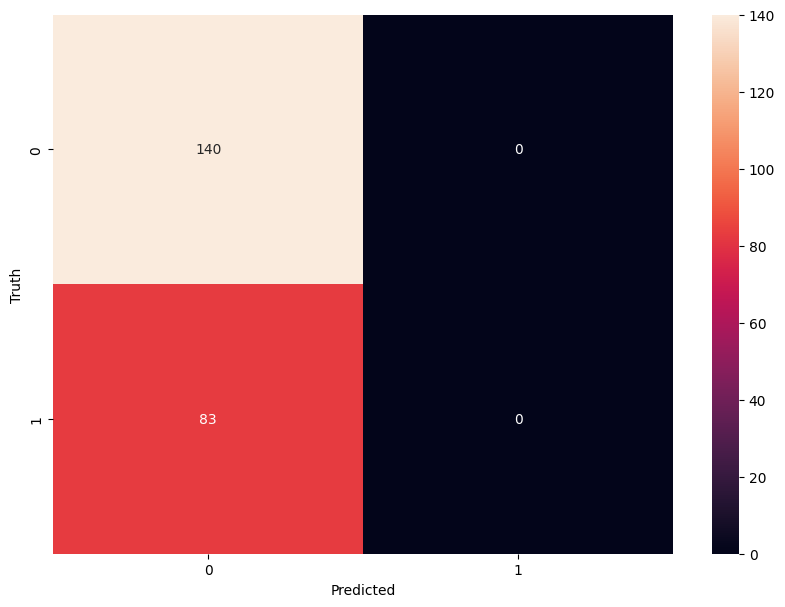

In [162]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels = y_test,predictions = y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm,annot = True,fmt = "d")
plt.xlabel("Predicted")
plt.ylabel("Truth")